*Copyright 2025 Jaeyoung Chun / Winning Twelve*

You may not make copies of this and use or distribute it for any purpose.

# Yellow Cards

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

## Load Data

In [2]:
df_events = pd.read_parquet("./data/raw_events.parquet")

In [3]:
df_events

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,"{'formation': 433.0, 'lineup': [{'jersey_numbe...",South Korea,791,00:00:00.000,Starting XI,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,"{'formation': 433.0, 'lineup': [{'jersey_numbe...",Portugal,780,00:00:00.000,Starting XI,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,Portugal,780,00:00:00.000,Half Start,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,South Korea,791,00:00:00.000,Half Start,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,South Korea,791,00:00:00.000,Half Start,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,None,None,None,None,None,None,None,None,None,None,...,None,None,Tactical,Ui-Jo Hwang,None,South Korea,791,00:36:13.753,Substitution,None
3375,None,None,None,None,None,None,None,None,None,None,...,None,None,Tactical,William Silva de Carvalho,None,Portugal,780,00:36:13.762,Substitution,None
3376,None,None,None,None,None,None,None,None,None,None,...,None,None,Tactical,Bernardo Mota Veiga de Carvalho e Silva,None,Portugal,780,00:36:13.790,Substitution,None
3377,None,None,None,None,None,None,None,None,None,None,...,None,None,Tactical,Yu-Min Cho,None,South Korea,791,00:47:46.061,Substitution,None


## Card Types

In [4]:
# columns that contain the word `card`
df_events.columns[ df_events.columns.str.contains("card") ]

Index(['bad_behaviour_card', 'foul_committed_card'], dtype='object')

## Foul Committed

### Search

In [5]:
df_yellow_cards = df_events[ df_events.foul_committed_card == "Yellow Card" ]

In [6]:
df_yellow_cards

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
3016,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,South Korea,791,00:35:42.240,Foul Committed,None


### Who, When, and Where?

In [7]:
df_yellow_cards.player

3016    Kang-In Lee
Name: player, dtype: object

In [8]:
df_yellow_cards.timestamp

3016    00:35:42.240
Name: timestamp, dtype: object

In [9]:
df_yellow_cards.location

3016    [87.1, 37.6]
Name: location, dtype: object

### Visualization

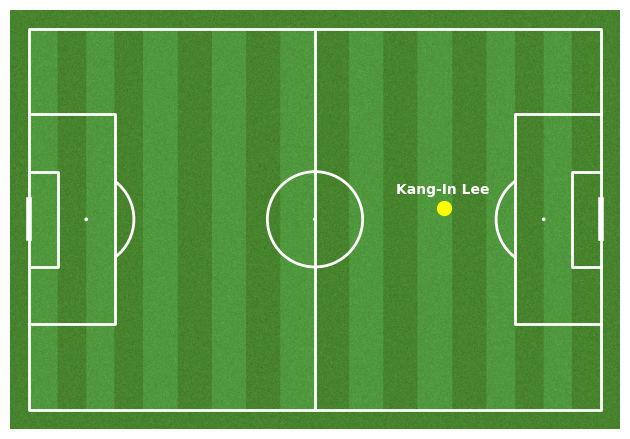

In [10]:
pitch = Pitch(
    pitch_type="statsbomb",
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

df = df_yellow_cards.squeeze()
x, y = df.location

pitch.scatter(x, y, color="yellow", s=100, ax=ax)

pitch.annotate(
    df.player,
    (x - 10, y - 3),
    color="white", fontweight="bold",
    ax=ax
)

plt.show()

## Bad Behaviour

### Search

In [11]:
df_bad = df_events[ df_events.bad_behaviour_card == "Yellow Card"]

In [12]:
df_bad

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
3378,Yellow Card,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,South Korea,791,00:47:36.651,Bad Behaviour,None


### Who, When, and Where?

In [13]:
df_bad.player

3378    Hee-Chan Hwang
Name: player, dtype: object

In [14]:
df_bad.timestamp

3378    00:47:36.651
Name: timestamp, dtype: object

In [15]:
df_bad.location

3378    None
Name: location, dtype: object

Why location is none?

### Visualization

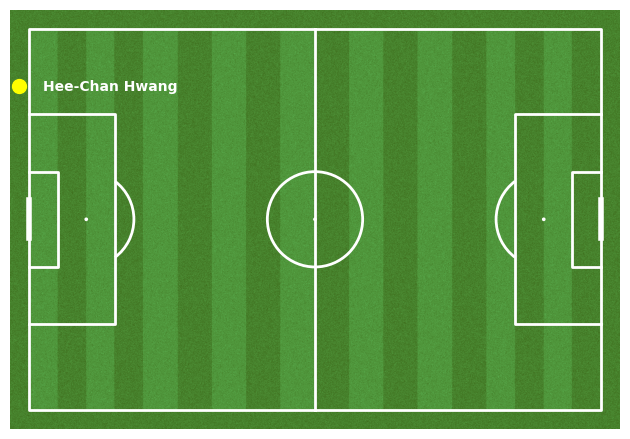

In [16]:
pitch = Pitch(
    pitch_type="statsbomb",
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

pitch.scatter(-2.2, 12, color="yellow", s=100, ax=ax)

pitch.annotate(
    df_bad.squeeze().player,
    (3, 13),
    color="white", fontweight="bold",
    ax=ax
)

plt.show()